## Problem: 4 Class Classification: - Card / No card

- The Basic Idea is to make a classifier that predicts whether the Customer will buy the card or not.
- Then, we will drop the Customers whose prediction comes out to be 'None'.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
data = pd.read_csv('./Dataset/Training_Dataset.csv')

## Part 01 : Preprocesing Steps

In [3]:
# Dropping Mvar1, Label Encoding Categorical Variable -> Mvar 12, Seperating Target Variabele

In [4]:
data.drop('mvar1',inplace=True,axis=1)
data.drop('cm_key',inplace=True,axis=1)

In [5]:
from sklearn import preprocessing

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
le.fit(data['mvar12'])

LabelEncoder()

In [8]:
le.classes_

array(['Apparel', 'Automotive         ', 'Construction       ',
       'Consumables        ', 'Durable goods      ', 'Entertainment      ',
       'Finance            ', 'Household          ', 'Manufacturing      ',
       'Mining             ', 'Misc services      ', 'Non durable goods  ',
       'Office supplies    ', 'Personal services  ', 'Produce            ',
       'Social services    ', 'Transport          ', 'Unknown            '], dtype=object)

In [9]:
data['mvar12'] = le.transform(data['mvar12'])

In [10]:
target = list()
for i in range(len(data)):
    if data['mvar49'][i] == 1:
        target.append(1)
    elif data['mvar50'][i] == 1:
        target.append(1)
    elif data['mvar51'][i] == 1:
        target.append(1)
    else:
        target.append(0)

In [11]:
len(target)

40000

In [12]:
data['target']= target

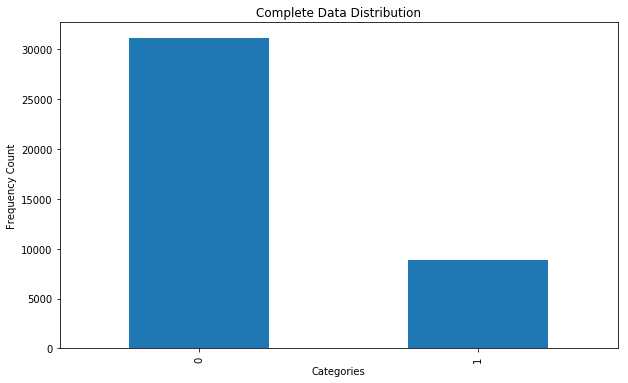

 No. of Card Holders: 8878
 No. of Non Card Holders: 31122


In [13]:
plt.figure(figsize=(10,6))
data.target.value_counts().plot(kind='bar')
plt.title('Complete Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')
plt.show()

print (" No. of Card Holders:", len(data[data['target']==1]))
print (" No. of Non Card Holders:", len(data[data['target']==0]))

In [14]:
data.head()

,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,target
0,0,106920,4,18,970,0.7969,0.1831,337236,1,6.0899,...,0,0,0,0,0,1,0,0,0,0
1,2,0,4,19,1030,0.0678,0.0000,2918974,1,4.2016,...,0,0,0,1,0,0,0,0,0,0
2,2,399168,4,35,327,0.7551,0.2986,498656,0,3.3760,...,0,0,0,0,0,1,0,0,0,0
3,0,267300,4,274,1258,0.7969,0.5297,2480074,1,4.1082,...,1,0,0,0,0,1,0,0,1,1
4,0,213840,6,1,0,2.3238,0.0000,2918974,0,0.0000,...,0,0,0,1,0,0,1,0,0,1


In [15]:
data.drop('mvar46',inplace=True,axis=1)
data.drop('mvar47',inplace=True,axis=1)
data.drop('mvar48',inplace=True,axis=1)
data.drop('mvar49',inplace=True,axis=1)
data.drop('mvar50',inplace=True,axis=1)
data.drop('mvar51',inplace=True,axis=1)

In [16]:
data.head()

,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,...,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,target
0,0,106920,4,18,970,0.7969,0.1831,337236,1,6.0899,...,129504.66,173841.11,131011.34,0,0,0,0,0,0,0
1,2,0,4,19,1030,0.0678,0.0000,2918974,1,4.2016,...,3666.10,21049.55,9146.66,0,0,0,0,0,0,0
2,2,399168,4,35,327,0.7551,0.2986,498656,0,3.3760,...,85357.68,38022.78,29979.13,0,0,0,0,0,0,0
3,0,267300,4,274,1258,0.7969,0.5297,2480074,1,4.1082,...,35437.46,23934.82,33299.45,1,0,0,1,0,0,1
4,0,213840,6,1,0,2.3238,0.0000,2918974,0,0.0000,...,91078.15,112817.05,53185.85,0,0,0,0,0,0,1


In [17]:
data['mvar12'].head()

0    12
1    17
2    10
3    15
4    17
Name: mvar12, dtype: int64

In [ ]:
df_majority = data[data.target==0]
df_minority = data[data.target==1]

In [ ]:
df_majority.head()

In [ ]:
df_minority.head()

In [ ]:
print("Number of rows in majority class: ")
len(df_majority)

In [ ]:
print("Number of rows in minority classes: ")
len(df_minority)

In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=8878,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.target.value_counts()

In [ ]:
from sklearn.utils import shuffle

In [ ]:
df_downsampled = shuffle(df_downsampled)

In [ ]:
target_downsampled = df_downsampled['target']

In [ ]:
df_downsampled.drop('target',inplace=True,axis=1)

In [ ]:
data.drop('target',inplace=True,axis=1)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
X = min_max_scaler.fit_transform(data)

In [ ]:
X

In [ ]:
X_downsampled = min_max_scaler.fit_transform(df_downsampled)

## Part 02: Splitting the Data into Trian & Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, target_downsampled, stratify=target_downsampled, test_size = 0.2)

### Distribution of Train & Test Set

In [ ]:
y1 = pd.DataFrame({'pred':y_train}) 

In [ ]:
y2 = pd.DataFrame({'pred':y_test}) 

In [ ]:
plt.figure(figsize=(10,6))
y1.pred.value_counts().plot(kind='bar')
plt.title('Complete Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')
plt.show()

print (" No. of Card Holders:", len(y1[y1['pred']==1]))
print (" No. of Non Card Holders:", len(y1[y1['pred']==0]))

In [ ]:
plt.figure(figsize=(10,6))
y2.pred.value_counts().plot(kind='bar')
plt.title('Complete Data Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')
plt.show()

print (" No. of Card Holders:", len(y2[y2['pred']==1]))
print (" No. of Non Card Holders:", len(y2[y2['pred']==0]))

___

## Part03: Training Models & Hyperparmater Tuning

## Model 1: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()

In [ ]:
sample_weight = np.array([5 if i == '0' else 1 for i in y_train])

In [ ]:
clf.fit(X_train,y_train)

___

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred)

In [ ]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [ ]:
labels = list(set(y_pred))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
plt.show()

In [ ]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## Predicting on LeaderBoard Data

In [ ]:
leader = pd.read_csv('./Dataset/Leaderboard_Dataset.csv')

In [ ]:
cm_key = leader['cm_key']

In [ ]:
cm_key

In [ ]:
leader.drop('mvar1',inplace=True,axis=1)
leader.drop('cm_key',inplace=True,axis=1)

In [ ]:
leader['mvar12'] = le.transform(leader['mvar12'])

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
X_1 = min_max_scaler.fit_transform(leader)

In [ ]:
out = clf.predict(X_1)

In [ ]:
len(leader)

In [ ]:
len(out)

In [ ]:
sub = pd.DataFrame({'cm_key':cm_key,'pred':out})

In [ ]:
sub_copy = sub

In [ ]:
sub = sub[sub.pred != 0]

In [ ]:
sub

In [ ]:
sub = sub[:1000]

In [ ]:
len(sub)

In [ ]:
sub.to_csv("Envible_VITVellore_7.csv",index=False)

## Other Functions to be incuded in Utils

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')